In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import make_classification

In [2]:
players_data = pd.read_csv('./raw_data/players_data.csv')

In [3]:
market_value = players_data['market_value'] 
market_value_data = []

for v in market_value: 
    if v[-3] == 'K':
        market_value_data.append(int(float(v[:-3]) * 1000) // 1000)  # Chia cho 1000 ở đây
    elif v[-3] == 'M':
        market_value_data.append(int(float(v[:-3]) * 1000000) // 1000)  # Chia cho 1000 ở đây
    else:
        market_value_data.append(int(float(v)) // 1000)  # Chia cho 1000 ở đây

In [4]:
players_data['market_value'] = market_value_data  

age_data = players_data['age']
age_data = age_data[age_data.str.len() == 6]
age_data = age_data.str[:2].sort_values(ascending=True) 
players_data['age'] = age_data.astype(int)  

height_data = players_data['height']
height_data = height_data[height_data.str.len() == 6]
height_data = height_data.str[:3].sort_values(ascending=True)  
players_data['height'] = height_data.astype(int) 

players_data['technical'] = players_data['technical'].astype(int) 
players_data['tactical'] = players_data['tactical'].astype(int)
players_data['defending'] = players_data['defending'].astype(int)
players_data['creativity'] = players_data['creativity'].astype(int)
players_data['attacking'] = players_data['attacking'].astype(int)
players_data['saves'] = players_data['saves'].astype(int)
players_data['anticipation'] = players_data['anticipation'].astype(int)
players_data['ball_distribution'] = players_data['ball_distribution'].astype(int)
players_data['aerial'] = players_data['aerial'].astype(int)


players_data_F = players_data[players_data['position'] == 'F']  # Forwards
players_data_D = players_data[players_data['position'] == 'D']  # Defenders
players_data_G = players_data[players_data['position'] == 'G']  # Goalkeepers
players_data_M = players_data[players_data['position'] == 'M']  # Midfielders 



In [5]:
# def create_csv_file(data, filename, header=True, mode='w'):
#   df = pd.DataFrame(data)
#   df.to_csv(filename, index=False, mode=mode, header=header)
# create_csv_file(players_data, 'demo_players_data.csv', header=False, mode='a')

                Value
Median     725.000000
Mean      3423.672571
Std       9188.024206
Max     196000.000000
Min         23.000000


<Axes: xlabel='market_value'>

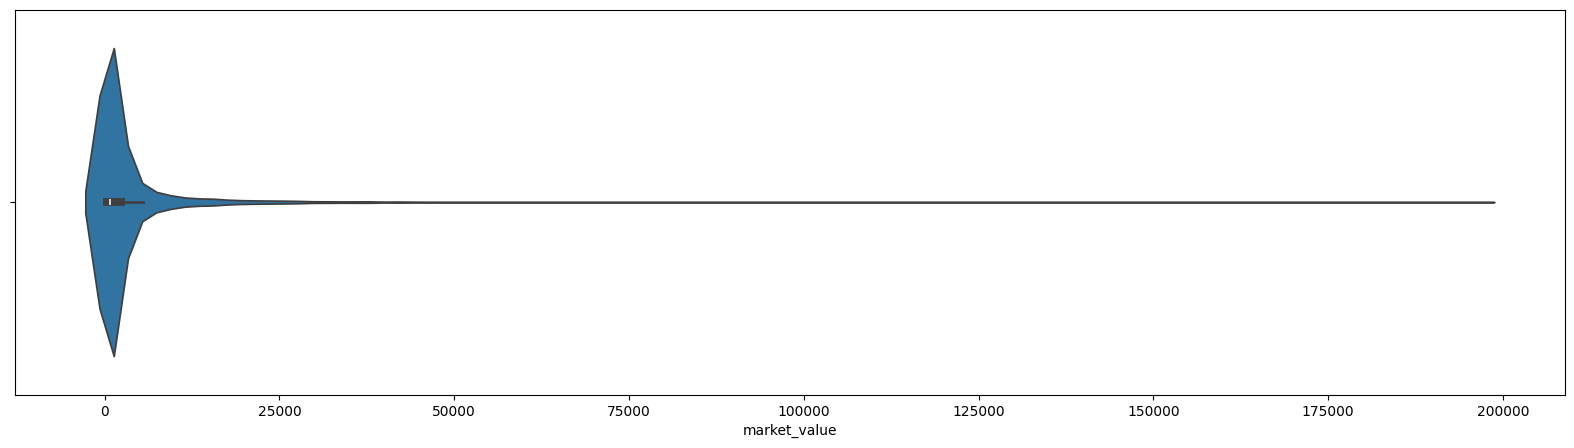

In [6]:
print(pd.DataFrame([np.median(players_data['market_value']),
                np.mean(players_data['market_value']),
                np.std(players_data['market_value']),
                np.max(players_data['market_value']),
                np.min(players_data['market_value'])],index=['Median', 'Mean', 'Std', 'Max', 'Min'],columns=['Value']))
plt.figure(figsize=(20, 5))
sns.violinplot(x = players_data['market_value'])  

                Value
Median   67000.000000
Mean     75720.000000
Std      27812.615842
Max     196000.000000
Min      51000.000000


<Axes: xlabel='market_value'>

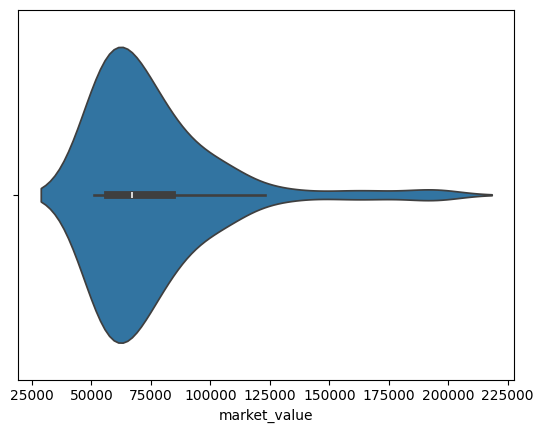

In [10]:
market_filter = players_data[players_data['market_value'] > 50000] 
print(pd.DataFrame([np.median(market_filter['market_value']),
                np.mean(market_filter['market_value']),
                np.std(market_filter['market_value']),
                np.max(market_filter['market_value']),
                np.min(market_filter['market_value'])],index=['Median', 'Mean', 'Std', 'Max', 'Min'],columns=['Value']))
sns.violinplot(x = market_filter['market_value'])  

### Tương quan 5 chỉ số tiền đạo

<Axes: xlabel='tactical'>

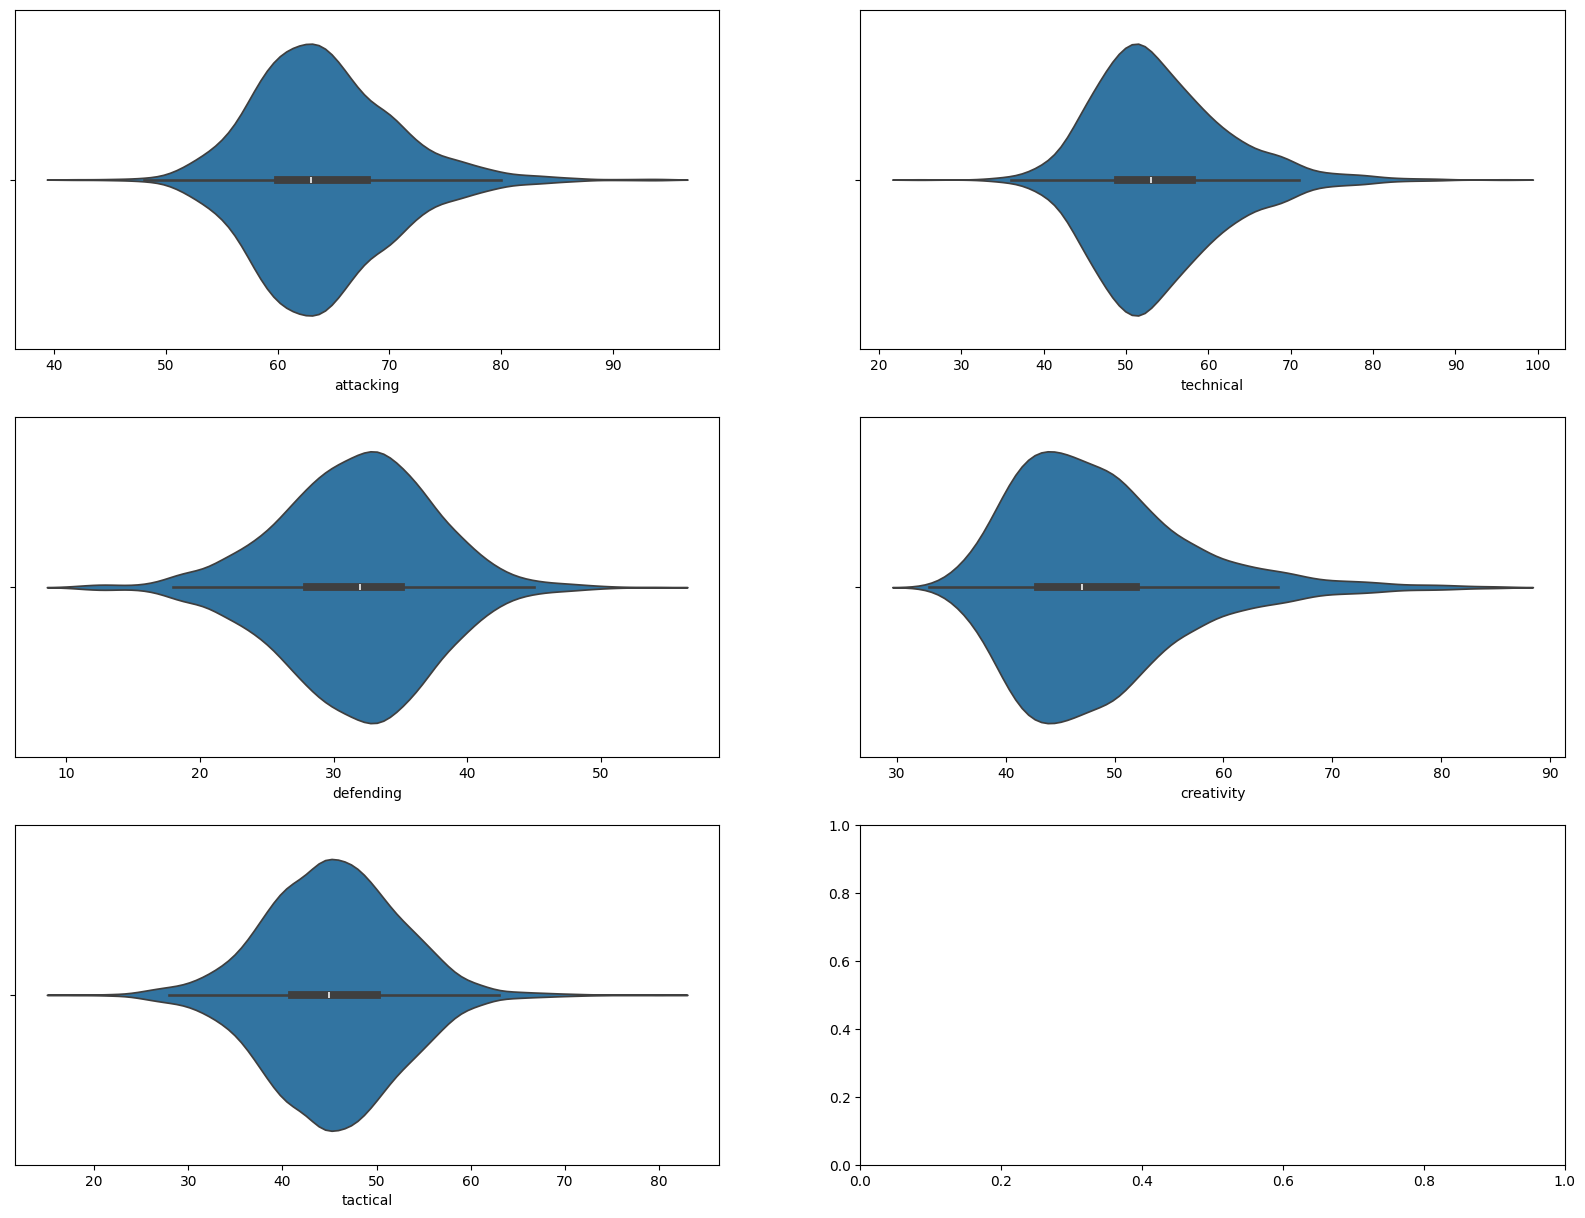

In [113]:
fig, axes = plt.subplots(3, 2, figsize=(20,15))
sns.violinplot(ax = axes[0,0],x = players_data_F['attacking']) 
sns.violinplot(ax = axes[0,1],x = players_data_F['technical']) 
sns.violinplot(ax = axes[1,0],x = players_data_F['defending']) 
sns.violinplot(ax = axes[1,1],x = players_data_F['creativity']) 
sns.violinplot(ax = axes[2,0],x = players_data_F['tactical']) 
# print(pd.DataFrame([np.median(players_data['attacking'].astype(float)),
#                 np.mean(players_data['attacking'].astype(float)),
#                 np.std(players_data['attacking'].astype(float)),
#                 np.max(players_data['attacking'].astype(float)),
#                 np.min(players_data['attacking'].astype(float))],index=['Median', 'Mean','Std', 'Max', 'Min'],columns=['Value']))

In [19]:
px.scatter_3d(players_data_F, x=players_data_F['attacking'], y=players_data_F['technical'], 
                z=players_data_F['defending'], color=players_data_F['tactical'], 
                size=players_data_F['creativity'], opacity=1)

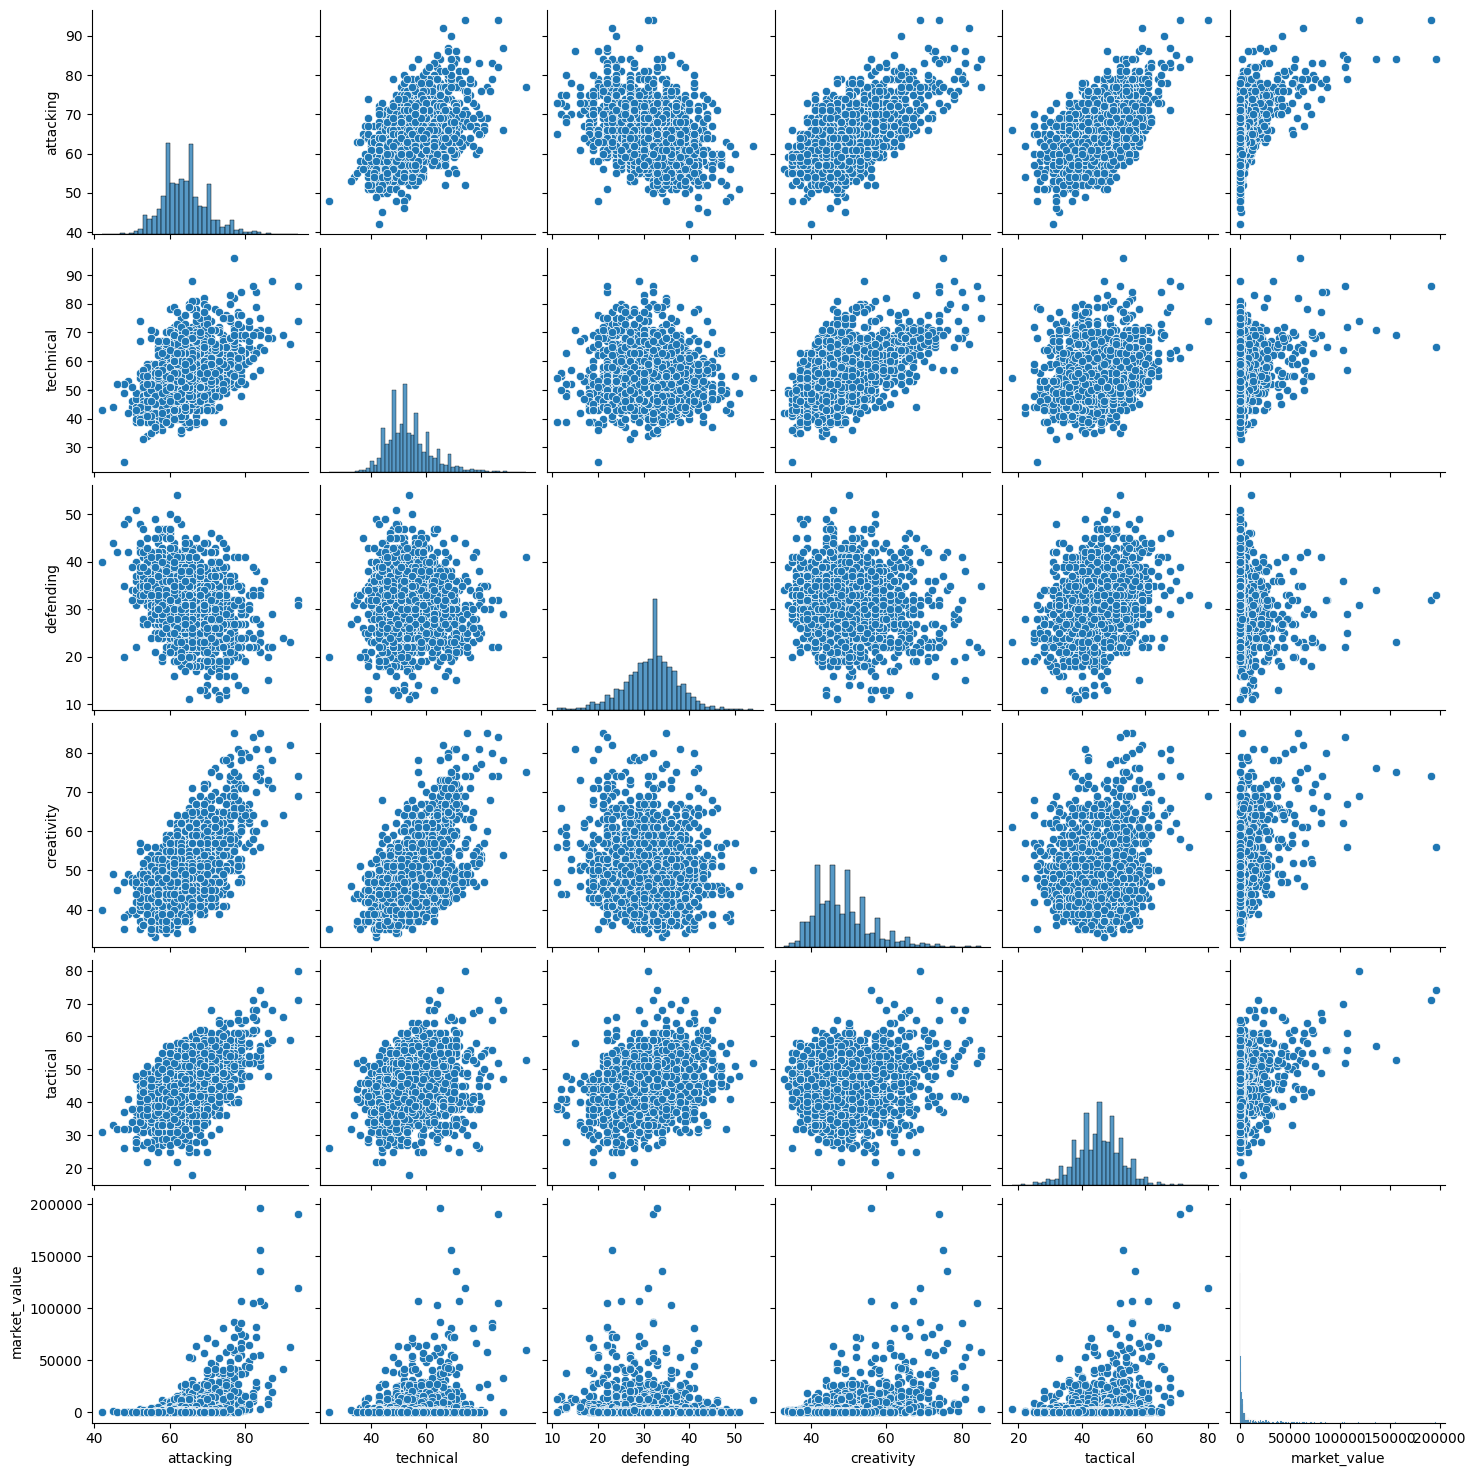

In [116]:
sns.pairplot(players_data_F[['attacking', 'technical', 'defending', 'creativity', 'tactical', 'market_value']])
# players_data

<Axes: xlabel='market_value', ylabel='tactical'>

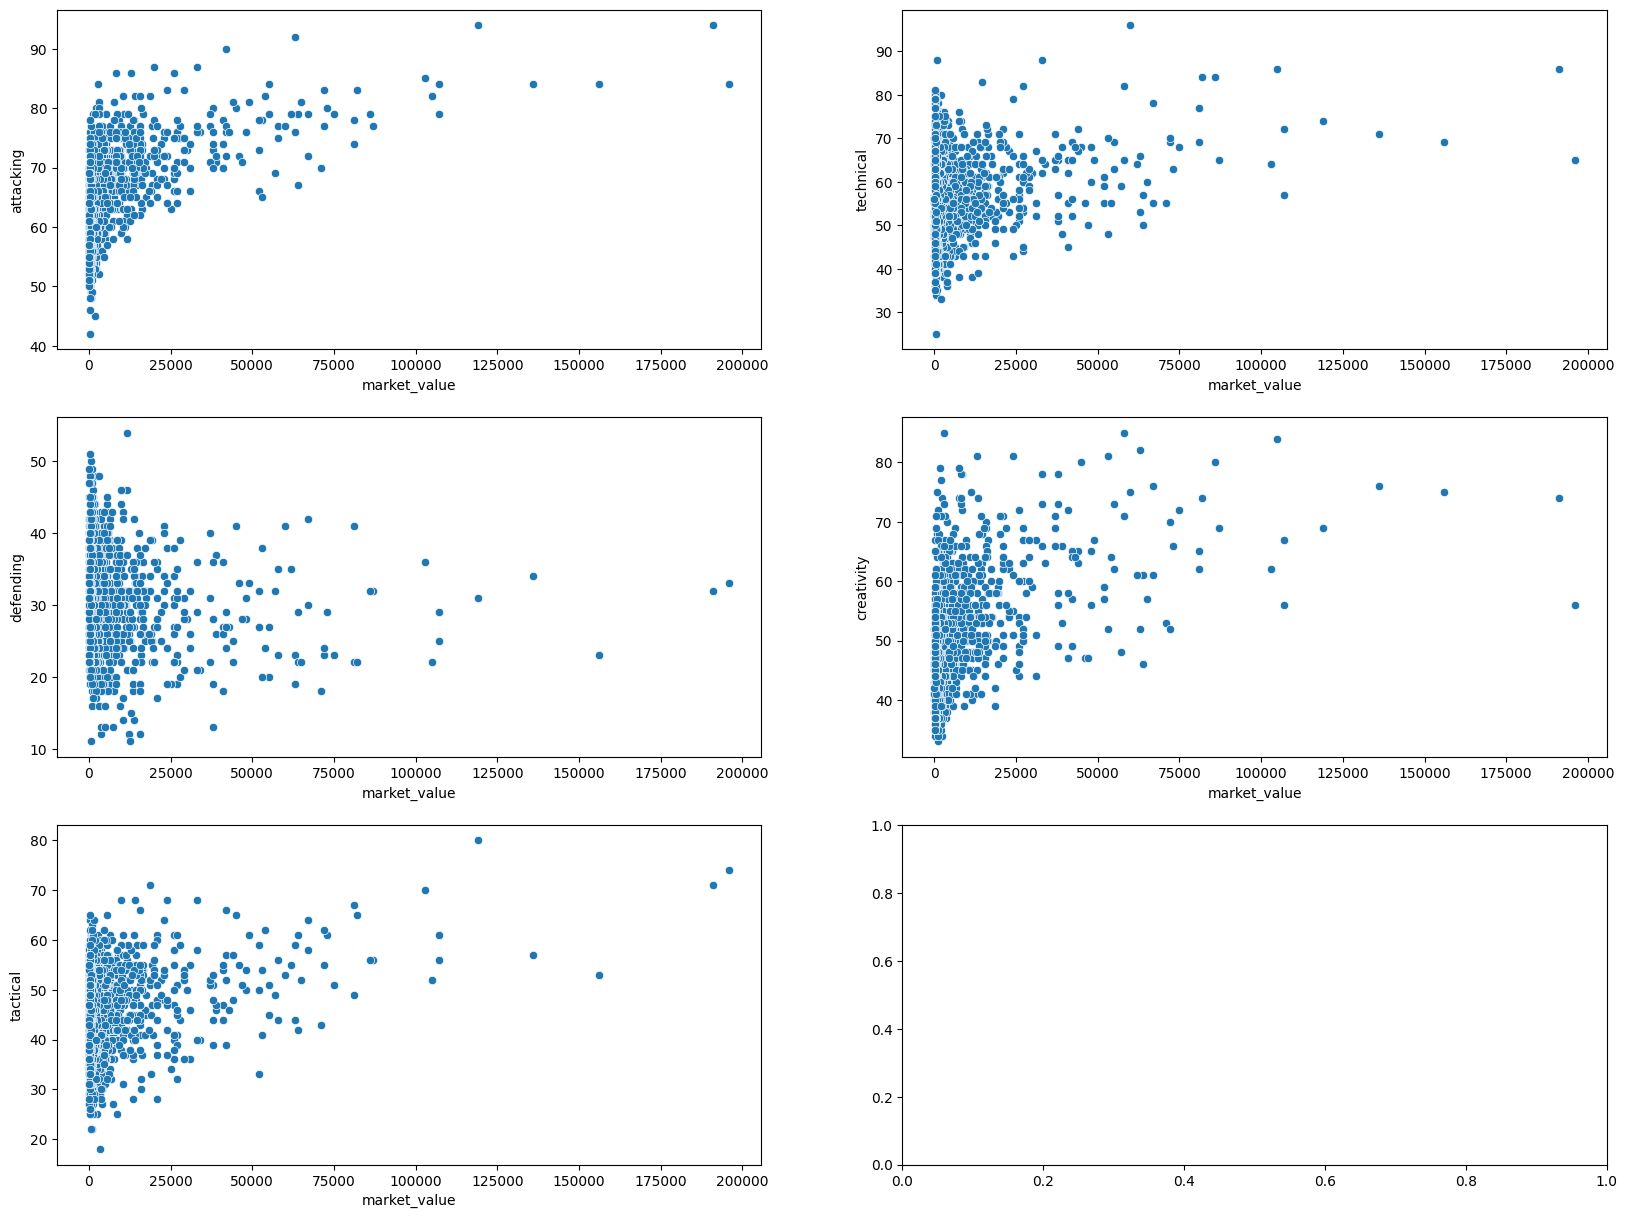

In [122]:
fig, axes = plt.subplots(3, 2, figsize=(20,15))
sns.scatterplot(ax = axes[0,0],x = players_data_F['market_value'],y = players_data_F['attacking']) 
sns.scatterplot(ax = axes[0,1],x = players_data_F['market_value'],y = players_data_F['technical']) 
sns.scatterplot(ax = axes[1,0],x = players_data_F['market_value'],y = players_data_F['defending']) 
sns.scatterplot(ax = axes[1,1],x = players_data_F['market_value'],y = players_data_F['creativity']) 
sns.scatterplot(ax = axes[2,0],x = players_data_F['market_value'],y = players_data_F['tactical']) 

``3 chỉ số tactical, defending, creativity có dạng hình vuông => market_value k phụ thuộc nhiều vào 3 chỉ số này``

<Axes: xlabel='market_value', ylabel='tactical'>

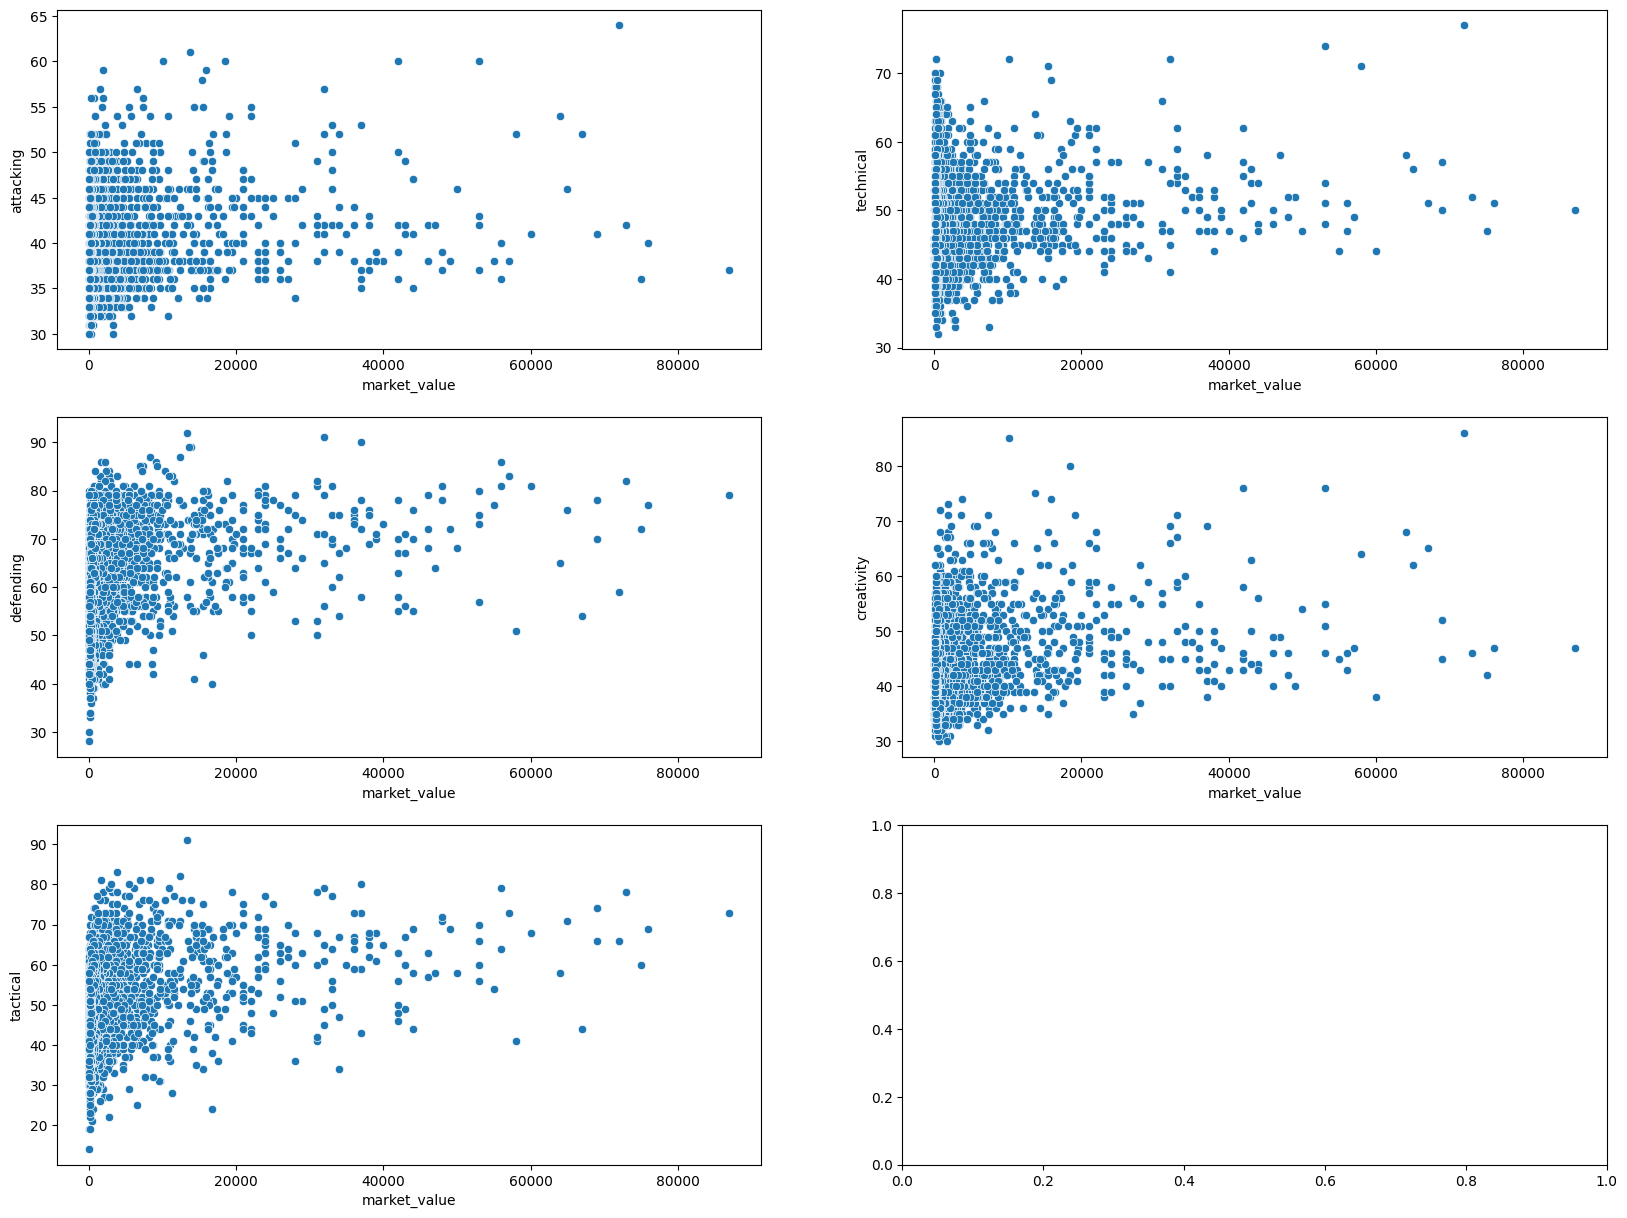

In [123]:
fig, axes = plt.subplots(3, 2, figsize=(20,15))
sns.scatterplot(ax = axes[0,0],x = players_data_D['market_value'],y = players_data_D['attacking']) 
sns.scatterplot(ax = axes[0,1],x = players_data_D['market_value'],y = players_data_D['technical']) 
sns.scatterplot(ax = axes[1,0],x = players_data_D['market_value'],y = players_data_D['defending']) 
sns.scatterplot(ax = axes[1,1],x = players_data_D['market_value'],y = players_data_D['creativity']) 
sns.scatterplot(ax = axes[2,0],x = players_data_D['market_value'],y = players_data_D['tactical']) 

### Ảnh hưởng chiều cao và tuổi đền giá (theo từng vị trí)

In [13]:
px.scatter(players_data, x='attacking',y='market_value', color='position', opacity=1)

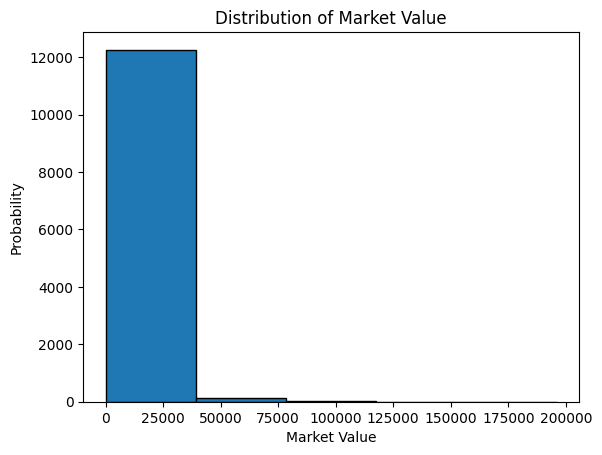

In [18]:
import matplotlib.pyplot as plt

# Lấy giá trị market_value từ players_data
market_values = players_data['market_value']

# Vẽ biểu đồ phân bố xác suất
plt.hist(market_values, bins=5, edgecolor='black')

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Distribution of Market Value')
plt.xlabel('Market Value')
plt.ylabel('Probability')

# Hiển thị biểu đồ
plt.show()


<Axes: ylabel='market_value'>

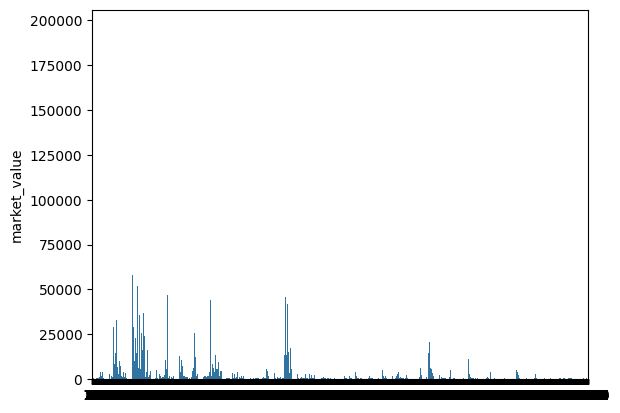

In [14]:
sns.barplot(players_data['market_value'])